# Algerian Forest Fires Dataset Project EDA Part 1

## 1. UNDERSTANDING THE GIVEN TASK
#### Task Given by instructor Krish Naik
* Solve in ipynb:
1. Import the dataset.
https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#
2. Do proper EDA(analysis) of your dataset and create a report
3. Then perform necessary preprocessing steps

## 2. DATA COLLECTION AND UNDERSTANDING

* I used a dataset on **Algerian Forest Fires** from UCI. The dataset contains a culmination of forest fire observations and data in two regions of Algeria: the Bejaia region and the Sidi Bel-Abbes region. The timeline of this dataset is from **June 2012 to September 2012**. In this project, we focused on whether certain weather features could predict forest fires in these regions using few Classification algorithms.


* As per the Task given i choose regression problem to predict fire weather index

## 3. DATA EXPLORATION

* In this step, we will apply Exploratory Data Analysis (EDA) to extract insights from the data set to know which features have contributed more in predicting Forest fire by performing Data Analysis using Pandas and Data visualization using Matplotlib & Seaborn. It is always a good practice to understand the data first and try to gather as many insights from it.


Below are tasks to be performed in EDA:

**1. Importing Libraries**


**2. Data Cleaning for EDA Report** 

**3. Exploratory Data Analysis (EDA) on all Features**


In [3]:
##Importing all the libraries needed
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
## import the data in

df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE (6) (1).csv", header = 1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [6]:
### figure out where the data separate into two

# locating the missing values
df[df.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [7]:
### create new column base on the region
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2
df[['Region']] = df[['Region']].astype(int)

In [8]:
## check 
df.columns
# Note: region has been added

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [9]:
### checking for missing values
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

## Insight 

There are few missing value ranging from with maximum for each column 2 and min is 1, so we can actually drop them

In [10]:
## remember whenever you dropna remember to reset_index, and make it permanent
df = df.dropna().reset_index(drop = True)   ### ensure to resave it back into your dataset!!!!
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [11]:
### Lets check if there is a missing value again
df.isnull().sum()

# Note: all missing values cleared

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.8+ KB


In [13]:
### to remove the in text heading
# Column which has string
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [14]:
### Dropping the row

df = df.drop(122).reset_index(drop = True)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
239,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
240,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4    RH          243 non-null    object
 5    Ws          243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.7+ KB


In [16]:
## seems RH and Ws have spaces
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [17]:
## remove the space
df.columns = df.columns.str.strip()

df.columns
# done


Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [18]:
#### change the data types

df[['month', 'day', 'year', 'Temperature','RH', 'Ws']] = df[['month', 'day', 'year', 'Temperature','RH', 'Ws']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.0+ KB


In [19]:
### changing the remaining 
newlist = [feature for feature in df.columns if df[feature].dtypes=='O']
for i in newlist:
    if i != "Classes":
        df[i] = df[i].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [20]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [21]:
df.describe().T   ### means to transpose

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


## Data Cleaning in target variable


In [22]:
# Check Unique values of target variable
df.Classes.value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [23]:
df.Classes = df.Classes.str.strip()
df.Classes.value_counts()

### Solved!!!

fire        137
not fire    106
Name: Classes, dtype: int64

### Region 1 (Bejaia Region)

In [24]:
df[:122]   ### slicing out the tables

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,1
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,1
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,1


### Region 2 (Sidi-Bel Abbes Region)

In [25]:
df[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,2
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [26]:
#### saving the new dataset into my directory
df.to_csv('Algerian_forest_fires_dataset_CLEANED.csv', index=False)

### 3.5 Exploratory Data Analysis (EDA)

In [27]:
#Droping Year features 
df1 = df.drop(['day','month','year'], axis=1)

In [28]:
df1.columns   ### validating the columns that where removed!!!!

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [29]:
# Encoding Not fire as 0 and Fire as 1
df1['Classes']= np.where(df1['Classes']== 'not fire',0,1)

In [30]:
## the output is imbalance but not too obvious
df1.Classes.value_counts()

1    137
0    106
Name: Classes, dtype: int64

## visualizing Distribution


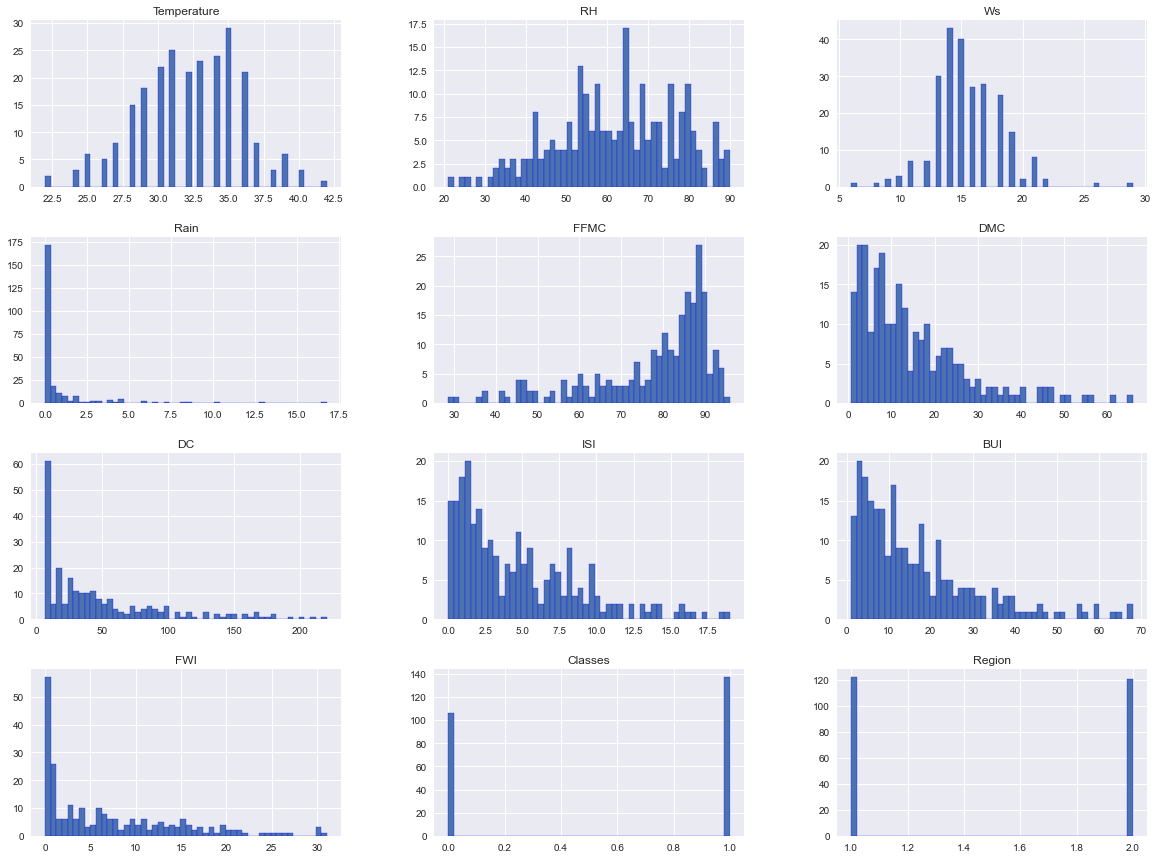

In [31]:
# PLot density plot for all features
plt.style.use('seaborn')
df1.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

# note: this helps see all the distributions

## Charts

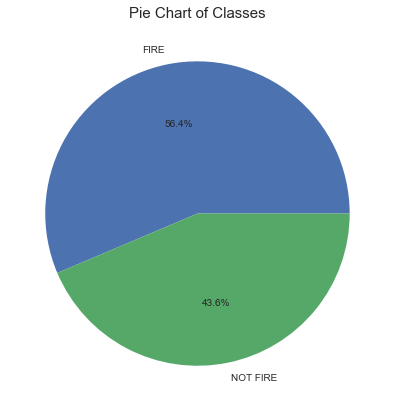

In [32]:
percentage  = df1.Classes.value_counts(normalize=True)*100

#plotting PieChart
classeslabels = ["FIRE", "NOT FIRE"]
plt.figure(figsize =(12, 7))
plt.pie(percentage,labels = classeslabels,autopct='%1.1f%%')  
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show() 

### Correlation chart


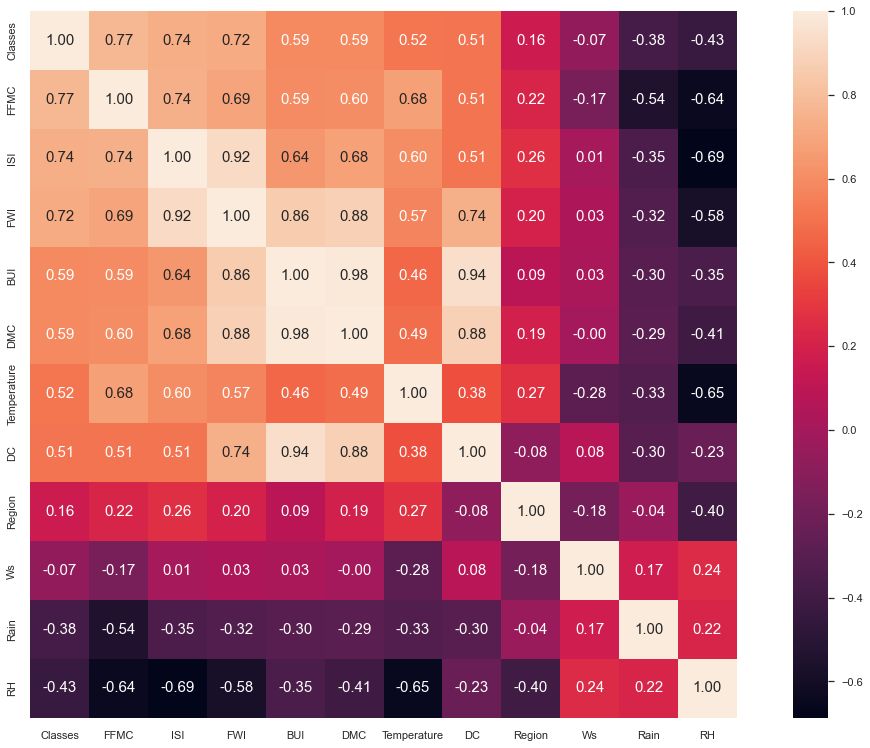

In [33]:
### define corr
corr = df1.corr()

# Correlation chart
k = len(df1.columns)  ### column length
cols = corr.nlargest(k, 'Classes')['Classes'].index
cm = np.corrcoef(df1[cols].values.T)
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(20, 13))
hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Understanding the Codes



<AxesSubplot:>

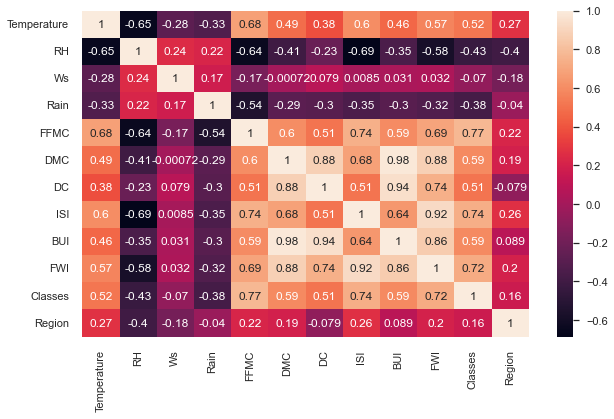

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(),annot=True)

In [35]:
### the first thing to define
corr = df1.corr()
corr

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


In [36]:
## defining the number of rows to be outputted
k = len(df1.columns)
k
### number of columns base on column name


12

The corr.nlargest(k, 'Classes') function returns the top k rows of a correlation matrix (stored as a pandas dataframe) that have the largest correlation coefficients with a specific column named 'Classes'.

In [37]:
corr.nlargest(k, 'Classes')

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Classes,0.516015,-0.432161,-0.069964,-0.379097,0.769492,0.585658,0.511123,0.735197,0.586639,0.719216,1.000000,0.162347
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
Region,0.269555,-0.402682,-0.181160,-0.040013,0.222241,0.192089,-0.078734,0.263197,0.089408,0.197102,0.162347,1.000000
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160


### Now we select only the Classes column

In [38]:
corr.nlargest(len(df1.columns), 'Classes')["Classes"]


Classes        1.000000
FFMC           0.769492
ISI            0.735197
FWI            0.719216
BUI            0.586639
DMC            0.585658
Temperature    0.516015
DC             0.511123
Region         0.162347
Ws            -0.069964
Rain          -0.379097
RH            -0.432161
Name: Classes, dtype: float64

In [39]:
### We index the output obtained

cols = corr.nlargest(len(df1.columns), 'Classes')["Classes"].index
cols

Index(['Classes', 'FFMC', 'ISI', 'FWI', 'BUI', 'DMC', 'Temperature', 'DC',
       'Region', 'Ws', 'Rain', 'RH'],
      dtype='object')

#### Canadian Forest Fire Weather Index (FWI) System
This column can be considered for Regression problem

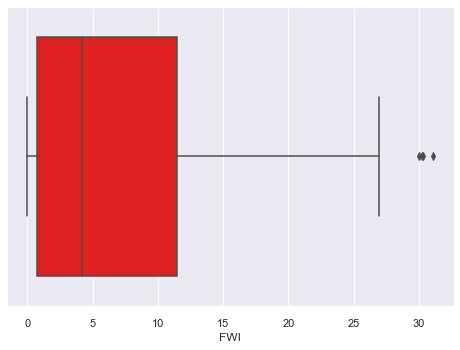

In [47]:
#Boxplot
ax = sns.boxplot(df['FWI'], color= 'red')

In [48]:
dftemp= df.loc[df['Region']== 1]
dftemp

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,1
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,1
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,1


In [46]:
dftemp.Region.value_counts()

1    122
Name: Region, dtype: int64